In [2]:
#basic requirements(basic packages)
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import sklearn


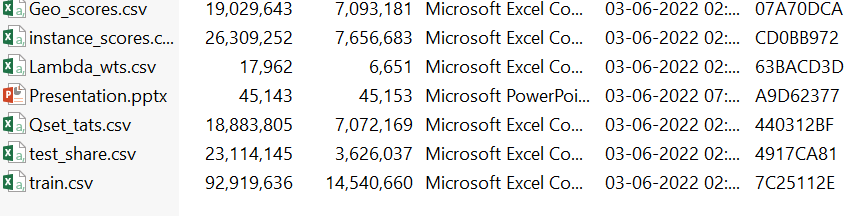

In [3]:
geo = pd.read_csv('Documents/resume domain projects/banking/Geo_scores.csv')
instance = pd.read_csv('Documents/resume domain projects/banking/instance_scores.csv')
lambda_wts = pd.read_csv('Documents/resume domain projects/banking/Lambda_wts.csv')
qset = pd.read_csv('Documents/resume domain projects/banking/Qset_tats.csv')
test = pd.read_csv('Documents/resume domain projects/banking/test_share.csv')
train = pd.read_csv('Documents/resume domain projects/banking/train.csv')

In [4]:
#to check how data look like
print(geo.head(2))
print('**************'*5)
print(instance.head(2))
print('**************'*5)
print(lambda_wts.head(2))
print('**************'*5)
print(qset .head(2))
print('**************'*5)
print(test.head(2))
print('**************'*5)
print(train.head(2))
print('**************'*5)

       id  geo_score
0   26674       4.48
1  204314       4.48
**********************************************************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
**********************************************************************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
**********************************************************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
**********************************************************************
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ..

In [5]:
print(geo.isnull().sum())
print('**************'*5)
print(instance.isnull().sum())
print('**************'*5)
print(lambda_wts.isnull().sum())
print('**************'*5)
print(qset .isnull().sum())
print('**************'*5)
print(test.isnull().sum())
print('**************'*5)
print(train.isnull().sum())
print('**************'*5)

id               0
geo_score    71543
dtype: int64
**********************************************************************
id                 0
instance_scores    0
dtype: int64
**********************************************************************
Group        0
lambda_wt    0
dtype: int64
**********************************************************************
id                           0
qsets_normalized_tat    103201
dtype: int64
**********************************************************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5       

In [6]:
print(geo.shape)
print('**************'*5)
print(instance.shape)
print('**************'*5)
print(lambda_wts.shape)
print('**************'*5)
print(qset.shape)
print('**************'*5)
print(test.shape)
print('**************'*5)
print(train.shape)
print('**************'*5)

(1424035, 2)
**********************************************************************
(1424035, 2)
**********************************************************************
(1400, 2)
**********************************************************************
(1424035, 2)
**********************************************************************
(56962, 27)
**********************************************************************
(227845, 28)
**********************************************************************


In [7]:
print(geo.isnull().sum()/len(geo)*100)
print('**************'*5)
print(qset.isnull().sum()/len(qset)*100)

id           0.000000
geo_score    5.023964
dtype: float64
**********************************************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [8]:
#id and uniques are the common fields in respective data sets
print(geo['id'].nunique())
print('**************'*5)
print(instance['id'].nunique())
print('**************'*5)
print(lambda_wts['Group'].nunique())
print('**************'*5)
print(qset['id'].nunique())
print('**************'*5)
print('Test',test['id'].nunique())
print('Test',test['Group'].nunique())
print('**************'*5)
print('Train',train['id'].nunique())
print('Train',train['Group'].nunique())
print('**************'*5)

284807
**********************************************************************
284807
**********************************************************************
1400
**********************************************************************
284807
**********************************************************************
Test 56962
Test 915
**********************************************************************
Train 227845
Train 1301
**********************************************************************


In [9]:
print(geo.info())
print('**************'*5)
print(qset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [10]:
print(geo.describe())
print('**************'*5)
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
**********************************************************************
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


<AxesSubplot:ylabel='geo_score'>

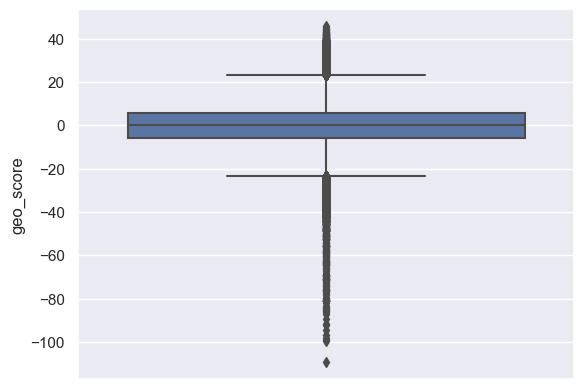

In [11]:
sns.boxplot(y='geo_score',data=geo)

<AxesSubplot:ylabel='qsets_normalized_tat'>

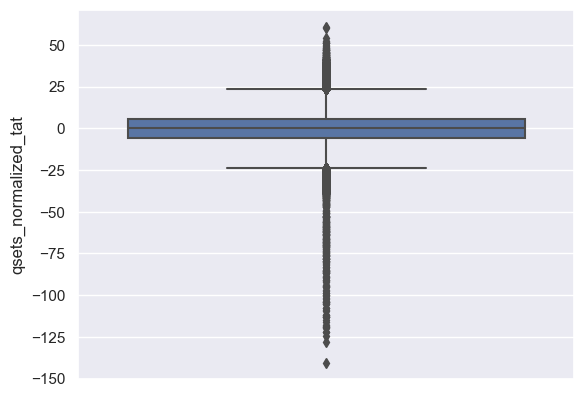

In [12]:
sns.boxplot(y='qsets_normalized_tat',data=qset)

In [13]:
qset['qsets_normalized_tat'].mean()

1.0940057569488714e-05

In [14]:
qset['qsets_normalized_tat'].median()

0.0199999999999997

In [15]:
qset['qsets_normalized_tat'].median()

0.0199999999999997

In [16]:
geo.fillna(0.18,inplace=True)

In [17]:
qset.fillna(0.019,inplace=True)

In [18]:
geo=geo.groupby('id').mean()
instance=instance.groupby('id').mean()
qset=qset.groupby('id').mean()

In [19]:
print(geo.shape)
print('**************'*5)
print(instance.shape)
print('**************'*5)
print(lambda_wts.shape)
print('**************'*5)
print(qset.shape)
print('**************'*5)
print(test.shape)
print('**************'*5)
print(train.shape)
print('**************'*5)

(284807, 1)
**********************************************************************
(284807, 1)
**********************************************************************
(1400, 2)
**********************************************************************
(284807, 1)
**********************************************************************
(56962, 27)
**********************************************************************
(227845, 28)
**********************************************************************


In [20]:
all_data= pd.concat([train,test],axis=0)

In [21]:
all_data.shape

(284807, 28)

In [22]:
train['data']='train'
test['data']='test'
print(train.head(1))
print(test.head(1))

       id   Group  Per1  Per2  Per3      Per4      Per5      Per6  Per7  Per8  \
0  112751  Grp169  1.07  0.58  0.48  0.766667  1.233333  1.993333  0.34  1.01   

   ...      Dem9     Cred1  Cred2     Cred3     Cred4     Cred5     Cred6  \
0  ...  0.726667  0.606667   1.01  0.933333  0.603333  0.686667  0.673333   

   Normalised_FNT  Target   data  
0         -245.75       0  train  

[1 rows x 29 columns]
       id   Group  Per1  Per2  Per3  Per4  Per5  Per6  Per7      Per8  ...  \
0  146574  Grp229  -0.3  1.54  0.22 -0.28  0.57  0.26   0.7  1.076667  ...   

       Dem8      Dem9     Cred1     Cred2     Cred3     Cred4     Cred5  \
0  0.546667  0.313333  0.703333  0.813333  0.776667  0.796667  0.823333   

      Cred6  Normalised_FNT  data  
0  0.783333         -249.75  test  

[1 rows x 28 columns]


In [23]:
all_data= pd.concat([train,test],axis=0)
all_data.shape

(284807, 29)

In [24]:
print(lambda_wts['Group'].nunique())
print('**************'*5)
print(all_data['Group'].nunique())
print('**************'*5)

1400
**********************************************************************
1400
**********************************************************************


In [25]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [26]:
all_data = pd.merge(all_data,lambda_wts,on='Group',how='left')

In [27]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60


In [28]:
all_data.shape

(284807, 30)

In [29]:
all_data = pd.merge(all_data,geo,on='id',how='left')

In [30]:
all_data.shape

(284807, 31)

In [31]:
all_data = pd.merge(all_data,instance,on='id',how='left')

In [32]:
all_data.shape

(284807, 32)

In [33]:
all_data = pd.merge(all_data,qset,on='id',how='left')

In [34]:
all_data.shape

(284807, 33)

In [35]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.603333,0.686667,0.673333,-245.75,0.0,train,-0.13,0.256,-0.06,-0.70
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.670000,0.553333,0.653333,-248.00,0.0,train,0.66,-0.250,0.52,0.14


In [36]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [37]:
train.shape

(227845, 33)

In [38]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [39]:
x1=train.drop(['id', 'Group','Target', 'data'],axis=1)
y1=train['Target']

In [40]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 0 to 227844
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Per1                  227845 non-null  float64
 1   Per2                  227845 non-null  float64
 2   Per3                  227845 non-null  float64
 3   Per4                  227845 non-null  float64
 4   Per5                  227845 non-null  float64
 5   Per6                  227845 non-null  float64
 6   Per7                  227845 non-null  float64
 7   Per8                  227845 non-null  float64
 8   Per9                  227845 non-null  float64
 9   Dem1                  227845 non-null  float64
 10  Dem2                  227845 non-null  float64
 11  Dem3                  227845 non-null  float64
 12  Dem4                  227845 non-null  float64
 13  Dem5                  227845 non-null  float64
 14  Dem6                  227845 non-null  float64
 15  

In [41]:
test.shape

(56962, 33)

In [42]:
test_data=test.drop(['id', 'Group','Target', 'data'],axis=1)

In [43]:
x1.head

<bound method NDFrame.head of             Per1      Per2      Per3      Per4      Per5      Per6      Per7  \
0       1.070000  0.580000  0.480000  0.766667  1.233333  1.993333  0.340000   
1       0.473333  1.206667  0.883333  1.430000  0.726667  0.626667  0.810000   
2       1.130000  0.143333  0.946667  0.123333  0.080000  0.836667  0.056667   
3       0.636667  1.090000  0.750000  0.940000  0.743333  0.346667  0.956667   
4       0.560000  1.013333  0.593333  0.416667  0.773333  0.460000  0.853333   
...          ...       ...       ...       ...       ...       ...       ...   
227840  0.476667  1.013333  0.536667  0.576667  1.406667  1.846667  0.600000   
227841  1.363333  0.730000  0.060000  0.776667  0.883333  0.466667  0.733333   
227842  1.060000  0.756667  0.906667  0.896667  0.503333  0.396667  0.683333   
227843  0.433333  1.013333  1.163333  0.940000  0.930000  0.900000  0.813333   
227844  1.006667  0.553333  0.946667  1.206667  0.406667  0.750000  0.520000   

         

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x=scaler.fit_transform(x1)

In [45]:
scaler_x

array([[ 0.61760338, -0.15994945, -0.36795308, ...,  0.24768007,
        -0.05485825, -0.82486609],
       [-0.29454707,  0.98296998,  0.42858792, ..., -0.25952338,
         0.47652766,  0.16317562],
       [ 0.70932801, -0.95634544,  0.5536646 , ..., -0.96118824,
         1.42935757, -0.50728126],
       ...,
       [ 0.60231594,  0.16225656,  0.4746688 , ...,  1.05960654,
        -0.11899103,  0.0102644 ],
       [-0.35569682,  0.63036718,  0.98155852, ..., -3.3067536 ,
        -0.60456781,  0.44994296],
       [ 0.52078294, -0.20858432,  0.5536646 , ..., -0.369785  ,
        -0.20144746,  0.64543407]])

In [46]:
y1.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [47]:
outlier_fraction= 394/(227451+394)

In [48]:
outlier_fraction

0.001729245759178389

In [49]:
#split data into training and test


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(scaler_x,y1,test_size=0.3,random_state=101)

In [51]:
!pip install mlxtend

In [52]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [53]:
CLF1 = LogisticRegression()
CLF2 = DecisionTreeClassifier()
CLF3 = RandomForestClassifier()
CLF4 = KNeighborsClassifier()
CLF5 = GaussianNB()
CLF6 = SVC()

SCLF = StackingClassifier(classifiers=[CLF2,CLF3,CLF4,CLF5,CLF6],meta_classifier=CLF1)

print('5-fold cross validation :\n')

for clf, label in zip([CLF2,CLF3,CLF4,CLF5,CLF6,SCLF],['DT','RF','KNN','GNB','SVMC','STACKING']):
    scores = cross_val_score(clf , x_train , y_train , cv=5 , scoring='accuracy')
    scores_test = cross_val_score(clf , x_test , y_test , cv=5 , scoring='accuracy')
    print("Accuracy :%0.2f (+/-%0.2f)[%s]" % (scores.mean(),scores.std(),label))
    print("Test Accuracy :%0.2f (+/-%0.2f)[%s]" % (scores.mean(),scores.std(),label))

5-fold cross validation :

Accuracy :1.00 (+/-0.00)[DT]
Test Accuracy :1.00 (+/-0.00)[DT]
Accuracy :1.00 (+/-0.00)[RF]
Test Accuracy :1.00 (+/-0.00)[RF]
Accuracy :1.00 (+/-0.00)[KNN]
Test Accuracy :1.00 (+/-0.00)[KNN]
Accuracy :0.98 (+/-0.00)[GNB]
Test Accuracy :0.98 (+/-0.00)[GNB]
Accuracy :1.00 (+/-0.00)[SVMC]
Test Accuracy :1.00 (+/-0.00)[SVMC]
Accuracy :1.00 (+/-0.00)[STACKING]
Test Accuracy :1.00 (+/-0.00)[STACKING]


In [54]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
sclf.fit(x_train,y_train)
y_pred_train= sclf.predict(x_train)
y_pred_test= sclf.predict(x_test)

In [58]:
classification = {'IsolationForest' :IsolationForest(contamination=outlier_fraction),
                 'LocalOutlierFactor': LocalOutlierFactor(contamination=outlier_fraction),
                 'OneClassSVM':OneClassSVM()}
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
n_outlier = 394

for i , (clf_name, clf) in enumerate(classification.items()):
    if clf_name == 'LocalOutlierFactor' :
        y_pred = clf.fit_predict(scaler_x)
        score_predict = clf.negative_outlier_factor_
    elif clf_name =='OneClassSVM' :
        clf.fit(scaler_x)
        y_pred = clf.predict(scaler_x)
    else:
        clf.fit(scaler_x)
        score_prediction = clf.decision_function(scaler_x)
        y_pred = clf.predict(scaler_x)
        
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    n_error = (y_pred !=y1).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print(accuracy_score(y1, y_pred))
    print(classification_report(y1, y_pred))
    print(confusion_matrix(y1, y_pred))

IsolationForest : 578
0.997463187693388
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.27      0.27      0.27       394

    accuracy                           1.00    227845
   macro avg       0.63      0.63      0.63    227845
weighted avg       1.00      1.00      1.00    227845

[[227162    289]
 [   289    105]]
LocalOutlierFactor : 788
0.9965415084816432
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845

[[227057    394]
 [   394      0]]
OneClassSVM : 113558
0.5015997717746714
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67    227451
         1.0       0.00      0.96      0.01